In [1]:
import matplotlib.pyplot as plt
import	pandas as pd

# Load the dataset
file_path = "img/Car Sales.xlsx - car_data.csv"
df = pd.read_csv(file_path)

#accessibility-safe color palette
accessible_colors = [
    "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"
]

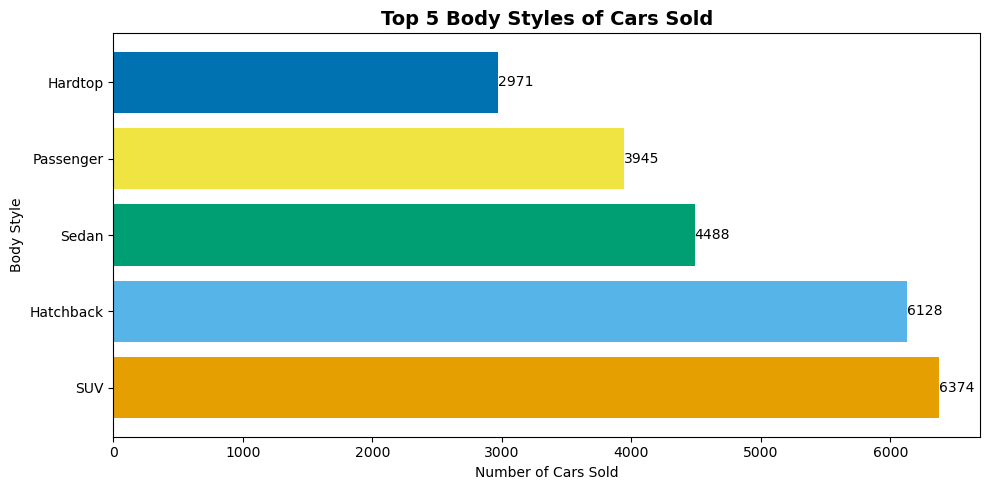

In [2]:
# Body Style Distribution
# Get top 5 body styles
top_body_styles = df['Body Style'].value_counts().nlargest(5)

# Plot using matplotlib with accessible colors
plt.figure(figsize=(10, 5))
bars = plt.barh(top_body_styles.index, top_body_styles.values, color=accessible_colors[:len(top_body_styles)])

# Add value labels inside bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(width), va='center')

# Titles and values
plt.title("Top 5 Body Styles of Cars Sold", fontsize=14, weight='bold')
plt.xlabel("Number of Cars Sold")
plt.ylabel("Body Style")
plt.tight_layout()
plt.show()

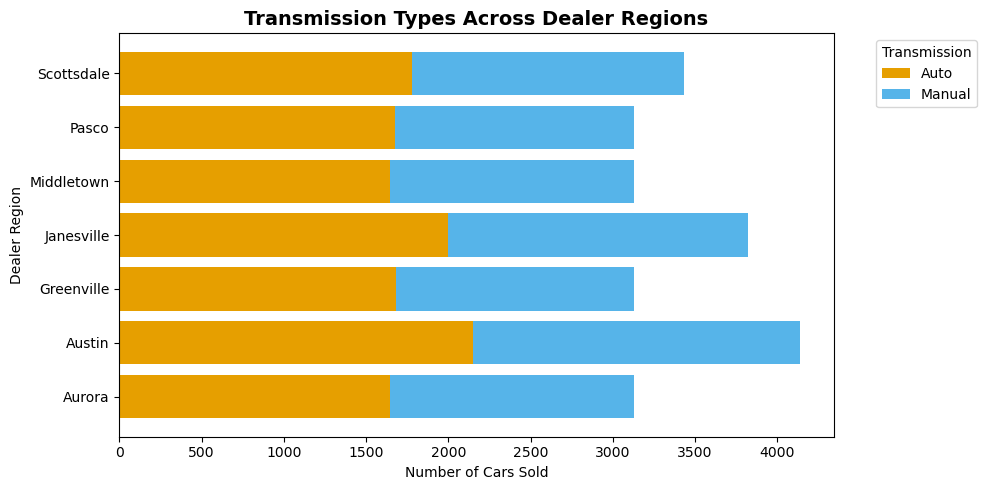

In [3]:
# Crosstab of Transmission vs Dealer Region
region_trans = pd.crosstab(df['Dealer_Region'], df['Transmission'])

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bottom = [0] * len(region_trans)

for i, column in enumerate(region_trans.columns):
    color = accessible_colors[i % len(accessible_colors)]
    ax.barh(region_trans.index, region_trans[column], left=bottom, label=column, color=color)
    bottom = [sum(x) for x in zip(bottom, region_trans[column])]

# Titles and values
ax.set_title("Transmission Types Across Dealer Regions", fontsize=14, weight='bold')
ax.set_xlabel("Number of Cars Sold")
ax.set_ylabel("Dealer Region")
ax.legend(title="Transmission", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


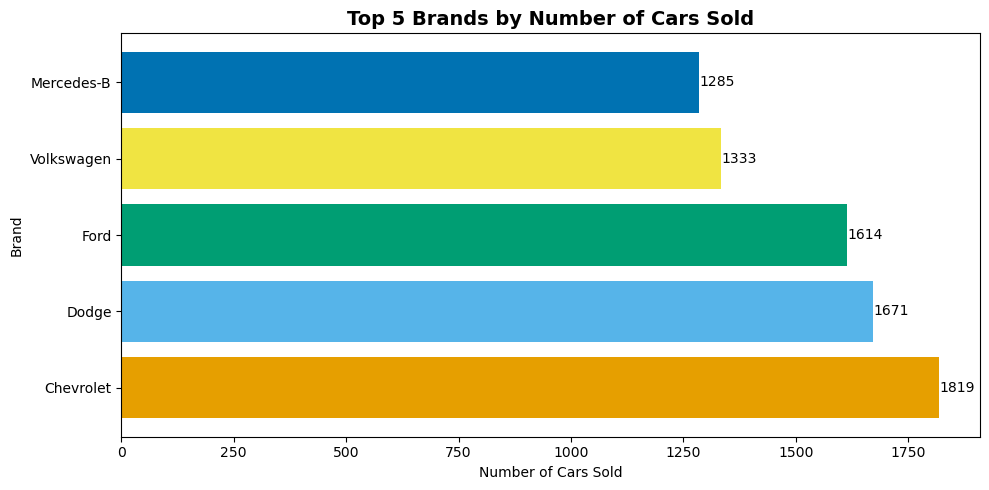

In [4]:
# Identify top 5 brands by sales count
top_5_brands = df['Company'].value_counts().head(5).index.tolist()

# Filter the dataframe
filtered_df = df[df['Company'].isin(top_5_brands)]

# Count sales by brand
brand_counts = filtered_df['Company'].value_counts()

# Plot using matplotlib with accessible color palette
plt.figure(figsize=(10, 5))
bars = plt.barh(brand_counts.index, brand_counts.values, color=accessible_colors[:len(brand_counts)])

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, str(width), va='center')

# Titles and values
plt.title("Top 5 Brands by Number of Cars Sold", fontsize=14, weight='bold')
plt.xlabel("Number of Cars Sold")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

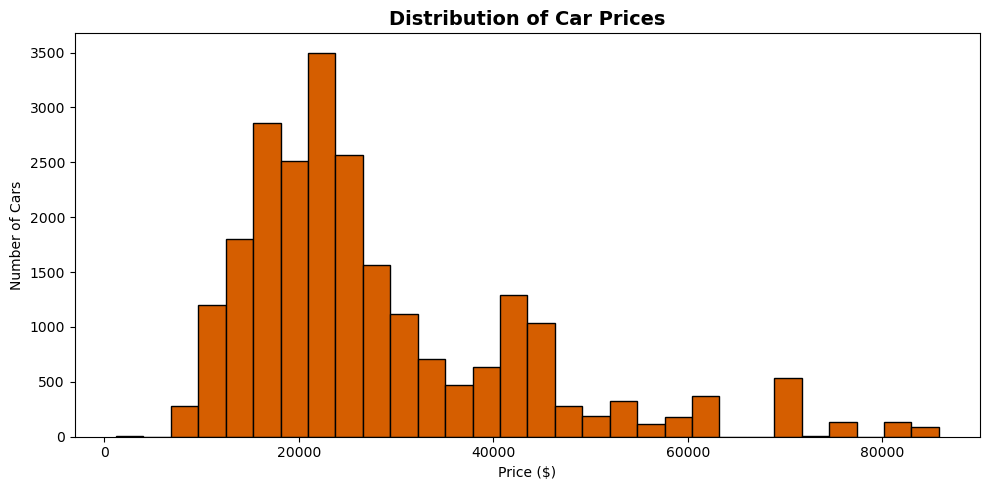

In [5]:
# Distribution of car prices using matplotlib and accessible palette
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df['Price ($)'], bins=30, color=accessible_colors[5], edgecolor='black')

# Title and values
plt.title("Distribution of Car Prices", fontsize=14, weight='bold')
plt.xlabel("Price ($)")
plt.ylabel("Number of Cars")
plt.tight_layout()
plt.show()
